Project write up graphs

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

Good Poisson with jump discontinuity!

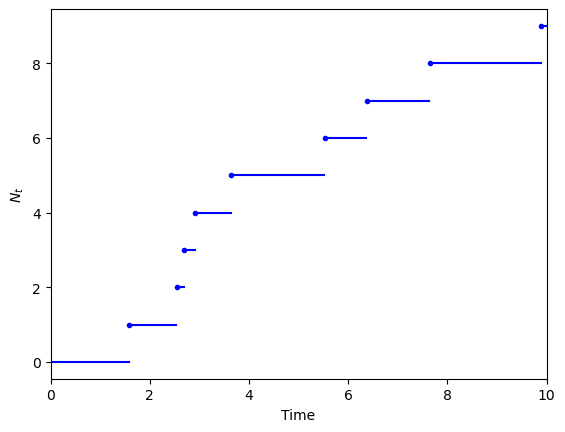

In [8]:
#Define parameters
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Nt = np.array([])
t = np.linspace(0, T, n+1)
#Generate jump times
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
#Convert to indexed values
jumps = np.ceil(Tn[:-1]/dt).astype(int)
#Adjust to add start and end points
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, 1001)
#Generate the value of the Poisson process
for i in range(len(jumps2)-1):
    Nt = np.append(Nt, np.repeat(i, jumps2[i+1] - jumps2[i]))
#Plot the process as continuous between the discontinuities
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Nt[x], color = "b")  
#Plot the jump points
plt.plot(t[jumps], Nt[jumps], ".", color = "b")
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$N_t$")
plt.savefig("Poisson")

Compensated with discontinuity 

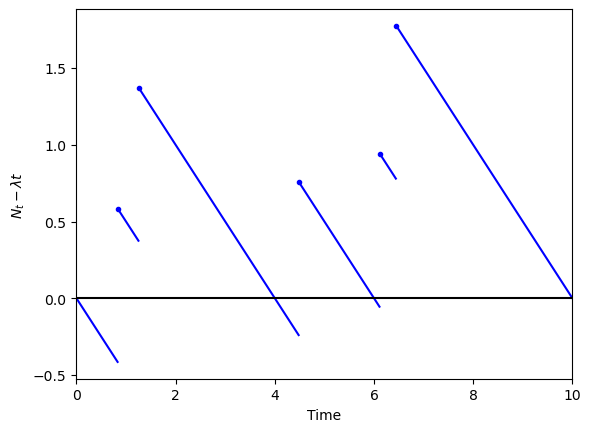

In [12]:
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Nt = np.array([])
t = np.linspace(0, T, n+1)
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
jumps = np.ceil(Tn[:-1]/dt).astype(int)
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, 1001)
for i in range(len(jumps2)-1):
    Nt = np.append(Nt, np.repeat(i, jumps2[i+1] - jumps2[i]))
Nt = Nt - rate*t
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Nt[x], color = "b")  
plt.plot(t[jumps], Nt[jumps], ".", color = "b")
plt.axline((0, 0), slope = 0, c = 'black')
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$N_t - \lambda t$")
plt.savefig("Compnesated Poisson")

Compound with Discontinuity

Exponential

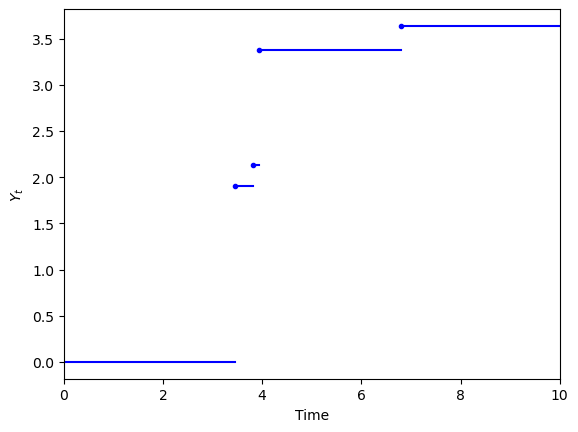

In [19]:
#Define parameters
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([])
t = np.linspace(0, T, n+1)
#Generate jump times
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
#Convert to indexed values
jumps = np.ceil(Tn[:-1]/dt).astype(int)
#Adjust to add start and end points
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, 1001)
#Generate jump sizes
jumpsize = stats.expon.rvs(scale = 1/rate, size = len(jumps))
vals = np.cumsum(jumpsize)
vals = np.insert(vals, 0, 0)
#Generate the value of the compound Poisson process
for i in range(len(jumps2)-1):
    Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
#Plot the process as continuous between the discontinuities
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Yt[x], color = "b")  
#Plot the jump points
plt.plot(t[jumps], Yt[jumps], ".", color = "b")
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$Y_t$")
plt.savefig("Compound Poisson Exp")

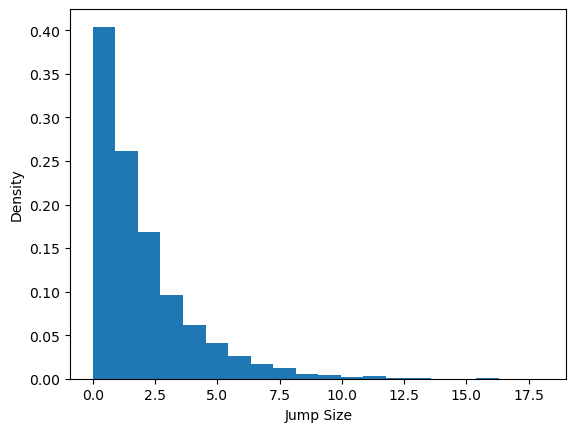

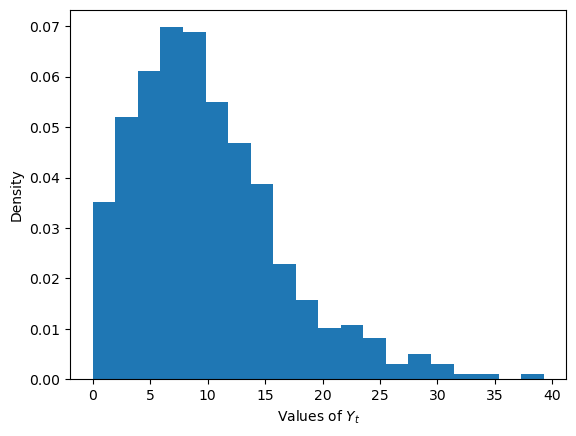

In [30]:
M = 1000; totjumps =  np.array([]); Vals = np.array([])
for j in range(M):
    #Define parameters
    s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([])
    t = np.linspace(0, T, n+1)
    #Generate jump times
    while s <= T-dt:
        s = s + stats.expon.rvs(scale = 1/rate)
        Tn = np.append(Tn, s)
    #Convert to indexed values
    jumps = np.ceil(Tn[:-1]/dt).astype(int)
    #Adjust to add start and end points
    jumps2 = np.insert(jumps, 0, 0)
    jumps2 = np.append(jumps2, 1001)
    #Generate jump sizes
    jumpsize = stats.expon.rvs(scale = 1/rate, size = len(jumps))
    vals = np.cumsum(jumpsize)
    vals = np.insert(vals, 0, 0)
    #Generate the value of the compound Poisson process
    for i in range(len(jumps2)-1):
        Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
    totjumps = np.append(totjumps, jumpsize)
    Vals = np.append(Vals, Yt[n])
plt.hist(totjumps, bins = 20, density = True)
plt.xlabel("Jump Size"); plt.ylabel("Density")
plt.savefig("Exp Dist Jump Size")
plt.show()
plt.hist(Vals, bins = 20, density = True)
plt.xlabel("Values of $Y_t$"); plt.ylabel("Density")
plt.savefig("Exp Dist Values")
plt.show()

Normal

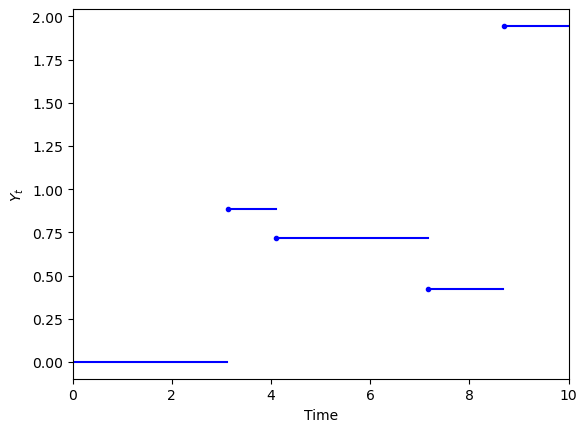

In [22]:
#Define parameters
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([])
t = np.linspace(0, T, n+1)
#Generate jump times
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
#Convert to indexed values
jumps = np.ceil(Tn[:-1]/dt).astype(int)
#Adjust to add start and end points
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, 1001)
#Generate jump sizes
jumpsize = stats.norm.rvs(size = len(jumps))
vals = np.cumsum(jumpsize)
vals = np.insert(vals, 0, 0)
#Generate the value of the compound Poisson process
for i in range(len(jumps2)-1):
    Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
#Plot the process as continuous between the discontinuities
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Yt[x], color = "b")  
#Plot the jump points
plt.plot(t[jumps], Yt[jumps], ".", color = "b")
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$Y_t$")
plt.savefig("Compund Poisson Normal")

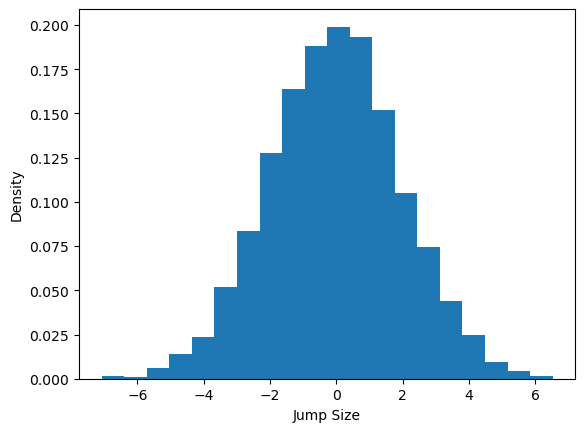

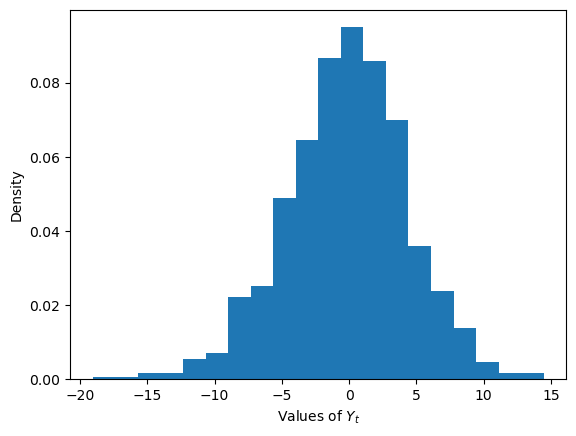

In [34]:
M = 1000; totjumps =  np.array([]); Vals = np.array([])
for j in range(M):
    #Define parameters
    s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([])
    t = np.linspace(0, T, n+1)
    #Generate jump times
    while s <= T-dt:
        s = s + stats.expon.rvs(scale = 1/rate)
        Tn = np.append(Tn, s)
    #Convert to indexed values
    jumps = np.ceil(Tn[:-1]/dt).astype(int)
    #Adjust to add start and end points
    jumps2 = np.insert(jumps, 0, 0)
    jumps2 = np.append(jumps2, 1001)
    #Generate jump sizes
    jumpsize = stats.norm.rvs(scale = 1/rate, size = len(jumps))
    vals = np.cumsum(jumpsize)
    vals = np.insert(vals, 0, 0)
    #Generate the value of the compound Poisson process
    for i in range(len(jumps2)-1):
        Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
    totjumps = np.append(totjumps, jumpsize)
    Vals = np.append(Vals, Yt[n])
#plt.hist(Vals, bins = 50), 
plt.hist(totjumps, bins = 20, density = True)
plt.xlabel("Jump Size"); plt.ylabel("Density")
plt.savefig("Norm Dist Jump Size")
plt.show()
plt.hist(Vals, bins = 20, density = True)
plt.xlabel("Values of $Y_t$"); plt.ylabel("Density")
plt.savefig("Norm Dist Values")
plt.show()

Compensated compound Poisson, Exponential jumps

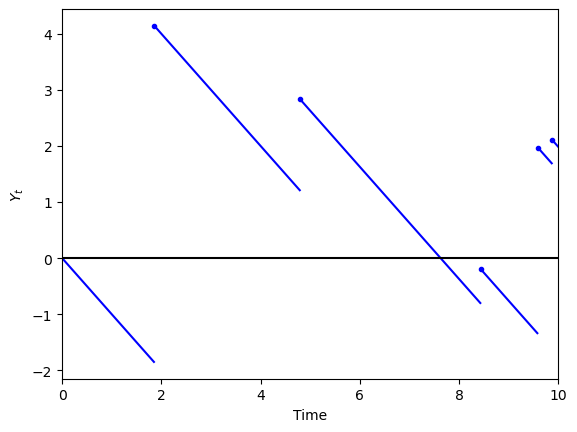

In [24]:
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([]); lam = 1/2
t = np.linspace(0, T, n+1)
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
jumps = np.ceil(Tn[:-1]/dt).astype(int)
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, 1001)
#Generate jump sizes
jumpsize = stats.expon.rvs(scale = 1/lam, size = len(jumps))
vals = np.cumsum(jumpsize)
vals = np.insert(vals, 0, 0)
for i in range(len(jumps2)-1):
    Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
Yt = Yt - 1/lam*rate*t   
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Yt[x], color = "b")  
plt.plot(t[jumps], Yt[jumps], ".", color = "b")
plt.axline((0, 0), slope = 0, c = 'black')
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$Y_t$")
plt.savefig("Compensated Compound Poisson")

Need to decide what to graphs should be included in the write up

Asset price trajectories of some sort

Options
- Asset price trajectory comparing no jumps to jumps (#discontinuity one)
- Change of measure, two different Poisson trajectories
- 

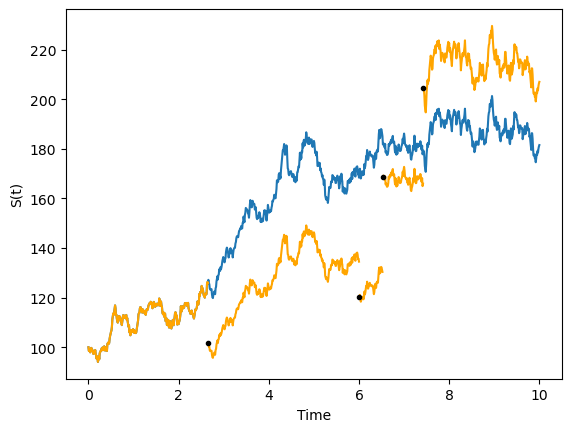

In [62]:
mu = 0.04; sig = 0.1; S0 = 100; N = 1000; T = 10; t = np.linspace(0, T, N+1)
dt = T/N
S = S0*np.ones(N)
W = np.random.normal(0, np.sqrt(dt), N) 
dS = np.exp((mu - (sig**2)/2)*dt + sig*W)
S = S*np.cumprod(dS)
S = np.insert(S, 0, S0)
plt.plot(t, S)
s = 0; rate = 0.5; Tn = ([]); n = 0; dZ = np.zeros(1000)
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
Zk = np.random.normal(0, 0.25, max(len(Tn)-1, 0))
jumps = np.ceil(Tn[:-1]/dt).astype(int)
dZ[jumps] = Zk
dZ = np.insert(dZ, 0, 0)
S2 = S*np.cumprod(1+dZ)
jumps2 = np.insert(jumps, 0, -1)
jumps2 = np.append(jumps2, N)
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i]+1, jumps2[i+1]+1) 
    plt.plot(t[x], S2[x], c = "orange")
plt.plot(t[jumps+1], S2[jumps+1], ".", c = "black")
plt.xlabel("Time"); plt.ylabel("S(t)")
plt.savefig("Asset Price Trajectory")

In [218]:
jumps2

array([  -1,   53,  212,  270,  278,  951, 1000])

In [1]:
lam = 0.5; lam2 = 2; c = -1 + lam2/lam; n = 20; N = 1000; T = 10; dt = T/N; t = np.linspace(0, T, N+1)
s = 0; Tn = ([])
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/lam2)
    Tn = np.append(Tn, s)
def Stepfun(t, Tn):
    count = 0
    for i in range(len(Tn)):
        if t >= Tn[i]:
            count = count + 1
    return count
y = np.zeros(len(t))
y2 = np.zeros(len(t))
for i in range(len(t)):
    y[i] = Stepfun(t[i]/(1+c), Tn) - lam*t[i]
    y2[i] = Stepfun(t[i], Tn) - lam2*t[i]
jumps = np.ceil(Tn[:-1]/dt).astype(int)
jumps2 = np.insert(jumps, 0, -1)
jumps2 = np.append(jumps2, N)
# tau2 = stats.expon.rvs(size = n, scale = 1/lam)
# Tn2 = np.cumsum(tau2)    
# y3 = np.zeros(len(t))
# y4 = np.zeros(len(t))


#plt.plot(t, y); plt.plot(t, y2)



for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i]+1, jumps2[i+1]) 
    plt.plot(t[x], y2[x], c = "orange")
plt.plot(t[jumps+1], y2[jumps+1], ".", c = "black")
plt.axline((0, 0), slope = 0, c = 'black')
plt.xlabel("Time"); plt.ylabel("$N_t$")
plt.savefig("Poisson Change of Variables")

NameError: name 'np' is not defined

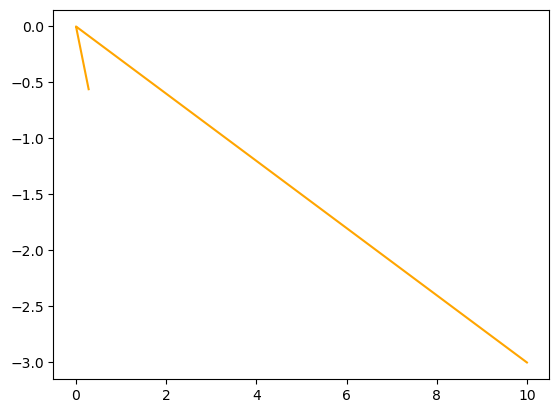

In [286]:
i = 0
x = np.arange(jumps2[i], jumps2[i+1]) 
plt.plot(t[x], y2[x], c = "orange")

In [276]:
y2[1]

-0.02

In [266]:
jumps2

array([  -1,    9,   26,   62,  105,  127,  247,  318,  411,  439,  523,
        599,  604,  640,  649,  657,  665,  743,  862,  866,  908, 1000])

In [267]:
jumps

array([  9,  26,  62, 105, 127, 247, 318, 411, 439, 523, 599, 604, 640,
       649, 657, 665, 743, 862, 866, 908])

In [264]:
jumps2

array([  -1,  265,  600,  652,  742, 1000])

In [262]:
t[x]

array([ 7.43,  7.44,  7.45,  7.46,  7.47,  7.48,  7.49,  7.5 ,  7.51,
        7.52,  7.53,  7.54,  7.55,  7.56,  7.57,  7.58,  7.59,  7.6 ,
        7.61,  7.62,  7.63,  7.64,  7.65,  7.66,  7.67,  7.68,  7.69,
        7.7 ,  7.71,  7.72,  7.73,  7.74,  7.75,  7.76,  7.77,  7.78,
        7.79,  7.8 ,  7.81,  7.82,  7.83,  7.84,  7.85,  7.86,  7.87,
        7.88,  7.89,  7.9 ,  7.91,  7.92,  7.93,  7.94,  7.95,  7.96,
        7.97,  7.98,  7.99,  8.  ,  8.01,  8.02,  8.03,  8.04,  8.05,
        8.06,  8.07,  8.08,  8.09,  8.1 ,  8.11,  8.12,  8.13,  8.14,
        8.15,  8.16,  8.17,  8.18,  8.19,  8.2 ,  8.21,  8.22,  8.23,
        8.24,  8.25,  8.26,  8.27,  8.28,  8.29,  8.3 ,  8.31,  8.32,
        8.33,  8.34,  8.35,  8.36,  8.37,  8.38,  8.39,  8.4 ,  8.41,
        8.42,  8.43,  8.44,  8.45,  8.46,  8.47,  8.48,  8.49,  8.5 ,
        8.51,  8.52,  8.53,  8.54,  8.55,  8.56,  8.57,  8.58,  8.59,
        8.6 ,  8.61,  8.62,  8.63,  8.64,  8.65,  8.66,  8.67,  8.68,
        8.69,  8.7 ,

In [261]:
t[jumps], Tn

(array([0.76, 0.82, 1.58, 1.78, 1.79, 2.24, 2.5 , 2.84, 3.01, 3.57, 4.23,
        4.39, 5.16, 5.66, 6.49, 6.91, 7.36, 7.77, 8.23, 9.35, 9.69, 9.85,
        9.87]),
 array([ 0.75582347,  0.81319729,  1.5715398 ,  1.7756726 ,  1.78620676,
         2.23408464,  2.49032557,  2.83945941,  3.00343326,  3.56722836,
         4.2215885 ,  4.38391586,  5.15881879,  5.65603443,  6.48043815,
         6.90564457,  7.35288388,  7.76717563,  8.22744551,  9.34645686,
         9.68465191,  9.84614634,  9.86503005, 10.04647899]))

In [258]:
Tn, jumps2

(array([ 0.23863394,  2.7547891 ,  4.0239864 ,  5.48860572,  5.8596559 ,
         7.70872248,  7.92273284,  8.49060423,  9.5215487 , 10.3830294 ]),
 array([  -1,  265,  600,  652,  742, 1000]))

In [ ]:
mu = 0.04; sig = 0.1; S0 = 100; N = 1000; T = 10; t = np.linspace(0, T, N+1)
dt = T/N
S = S0*np.ones(N)
s = 0; rate = 0.5; Tn = ([]); n = 0; dZ = np.zeros(1000)
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
jumps = np.ceil(Tn[:-1]/dt).astype(int)
dZ[jumps] = 1
dZ = np.insert(dZ, 0, 0)

for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i]+1, jumps2[i+1]+1) 
    plt.plot(t[x], S2[x], c = "orange")
plt.plot(t[jumps+1], S2[jumps+1], ".", c = "black")
plt.xlabel("Time"); plt.ylabel("S(t)")
plt.savefig("Poisson Change of Variables")

Will this be useful?

In [ ]:
S0 = 100; mu = 0.04; sig = 0.1; N = 1000; T = 10; rate = 0.5, eta = 1.5
dt = T/N; S = S0*np.ones(N); W = np.random.normal(0, np.sqrt(dt), N) 

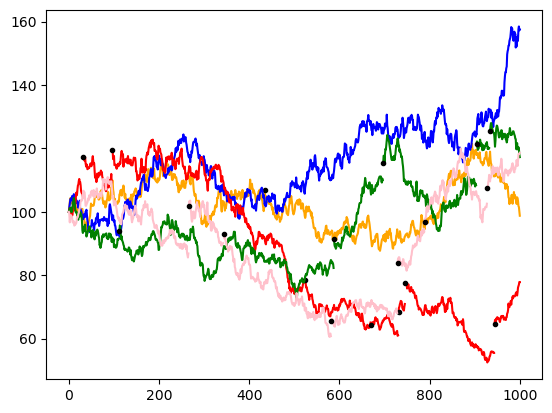

In [239]:
M = 5
colour = ["orange", "blue", "red", "green", "pink"]
for j in range(M):
    mu = 0.04; sig = 0.1; S0 = 100; N = 1000; T = 10; lam = 10; eta = 1
    dt = T/N
    S = S0*np.ones(N)
    W = np.random.normal(0, np.sqrt(dt), N) 
    s = 0; rate = 0.5; Tn = np.array([]); n = 0; dZ = np.zeros(1000)
    #plt.plot(S)
    while s <= T-dt:
        s = s + stats.expon.rvs(scale = 1/rate)
        Tn = np.append(Tn, s)
    Zk = stats.expon.rvs(scale = 1/lam, size = max(len(Tn)-1, 0))
    jumps = np.ceil(Tn[:-1]/dt).astype(int)
    dZ[jumps] = Zk
    dZ = np.insert(dZ, 0, 0)
    dS = np.exp((mu - eta*rate*1/lam - (sig**2)/2)*dt + sig*W)
    S = S*np.cumprod(dS)
    S = np.insert(S, 0, S0)
    S2 = S*np.cumprod(1+eta*dZ)
    jumps2 = np.insert(jumps, 0, -1)
    jumps2 = np.append(jumps2, N)
    for i in range(len(jumps2)-1):
        x = np.arange(jumps2[i]+1, jumps2[i+1]+1) 
        plt.plot(x, S2[x], c = colour[j])
    plt.plot(jumps+1, S2[jumps+1], ".", c = "black")

In [238]:
np.mean(V)

147.37219409301352

In [206]:
Tn = np.array([0])
np.ceil(Tn[:-1]/dt).astype(int)

array([], dtype=int32)

In [192]:
np.mean(V)

91.45701898266265

In [5]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/05/28664524fcc67c078313d482bf25fe403e9399130622cfc89e185ec0abf6/yfinance-0.2.54-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 1.1 MB/s eta 0:00:03
     - -------------------------------------- 0.1/3.0 MB 819.2 kB/s eta 0:00:04
     - -------------------------------------- 0.1/3.0 

In [167]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


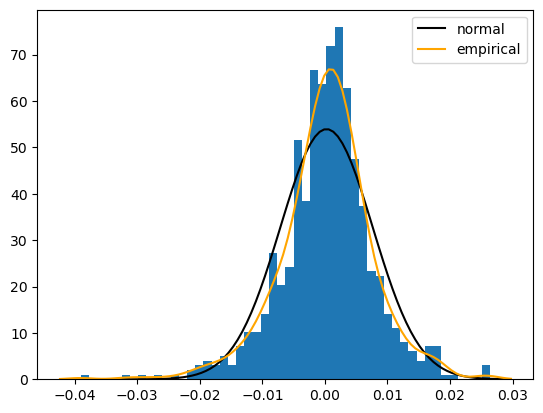

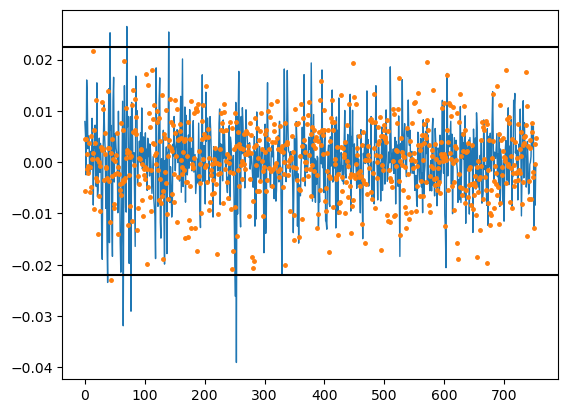

[*********************100%***********************]  1 of 1 completed


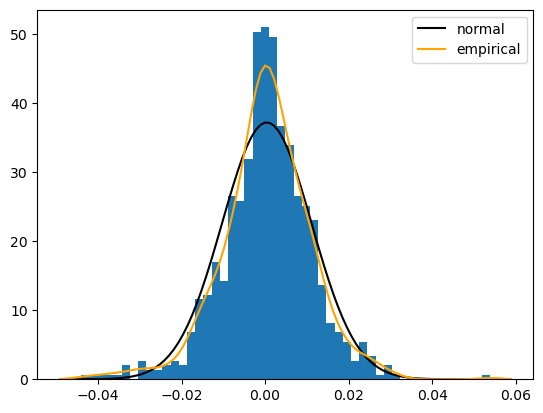

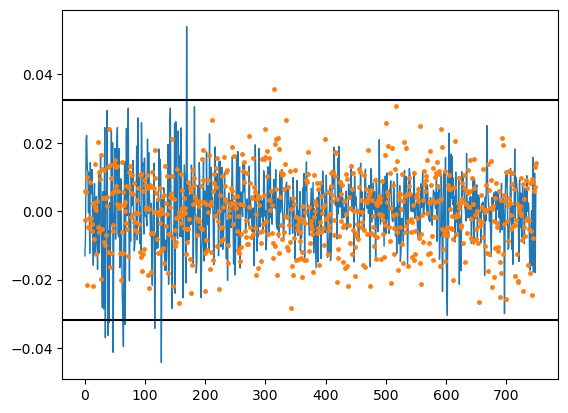

In [228]:
data = yf.download("^FTSE", start="2022-03-10", end="2025-03-10", auto_adjust=True)
close = data["Close"].to_numpy()
logreturns = np.log(close[1:]/close[:-1])
mean = np.mean(logreturns); sd = np.sqrt(np.var(logreturns))

#hist with norm and emperical overlayed
plt.hist(logreturns, density = True, bins = 50)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
kde = stats.gaussian_kde(logreturns.T)
kde_vals = kde(x)
norm = stats.norm.pdf(x, mean, sd)
plt.plot(x, norm, label = "normal", color = "black")
plt.plot(x, kde_vals, color = "orange", label = "empirical")
plt.legend(loc = "upper right")
plt.savefig("FTSE hist")
plt.show()

# #Q-Q plot
# stats.probplot(logreturns.flatten(), dist = "norm", plot = plt)
# plt.show()

#Log returns and theoretical random normal values
plt.plot(logreturns, linewidth = 1)
nrm = np.random.normal(loc = mean, scale = sd, size = len(logreturns))
plt.plot(nrm, ".", markersize = 5)
plt.axhline(y = mean + 3*sd, color = "black")
plt.axhline(y = mean - 3*sd, color = "black")
plt.savefig("FTSE vs sample")
plt.show()

data = yf.download("^GSPC", start="2022-03-10", end="2025-03-10", auto_adjust=True)
close = data["Close"].to_numpy()
logreturns = np.log(close[1:]/close[:-1])
mean = np.mean(logreturns); sd = np.sqrt(np.var(logreturns))

#hist with norm and emperical overlayed
plt.hist(logreturns, density = True, bins = 50)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
kde = stats.gaussian_kde(logreturns.T)
kde_vals = kde(x)
norm = stats.norm.pdf(x, mean, sd)
plt.plot(x, norm, label = "normal", color = "black")
plt.plot(x, kde_vals, color = "orange", label = "empirical")
plt.legend(loc = "upper right")
plt.savefig("SP500 hist")
plt.show()

# #Q-Q plot
# stats.probplot(logreturns.flatten(), dist = "norm", plot = plt)
# plt.show()

#Log returns and theoretical random normal values
plt.plot(logreturns, linewidth = 1)
nrm = np.random.normal(loc = mean, scale = sd, size = len(logreturns))
plt.plot(nrm, ".", markersize = 5)
plt.axhline(y = mean + 3*sd, color = "black")
plt.axhline(y = mean - 3*sd, color = "black")
plt.savefig("SP500 vs sample")
plt.show()

Am going to redo graphs here as I think required, for chapter 6

In [66]:
import time

In [137]:
start = time.time()
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2 - rate*(np.exp(delta+eta**2/2)-1)
M = 1000000
confint = np.zeros(2)
vCall = 0
S = np.zeros(M)
Nt = np.random.poisson(lam = rate*T, size = M)
W = np.random.normal(0, np.sqrt(T), size = M)
for j in range(M):
    S[j] = S0*np.exp(mu*T+sig*W[j]+sum(np.random.normal(delta, eta, Nt[j])))
Payoff = np.exp(-r*T)*np.maximum(S - K,0)
aMcall=np.mean(Payoff);
bMcall=np.std(Payoff);
confint = [aMcall-1.96*bMcall/np.sqrt(M),aMcall+1.96*bMcall/np.sqrt(M)]
vCall = aMcall
price = 0
for n in range(100):
    price = price + (T*rate)**n/math.factorial(n)*BScall(S0*np.exp(n*delta+n*eta**2/2 - rate*(np.exp(delta+eta**2/2)-1)*T), K, r, np.sqrt(sig**2 + n*eta**2/T), T)
BSprice = np.exp(-rate*T)*price
confint, BSprice
end = time.time()
print(end-start)
confint

13.513932704925537


[38.765757277476794, 38.979593122678736]

In [101]:
a = [1,2,3]
np.random.normal(0,a)

array([ 1.73256261,  1.8323532 , -0.74448314])

In [104]:
S4 = S0*np.exp(mu*T+sig*W+np.random.normal(Nt*delta, Nt*eta))

In [111]:
np.mean(S), np.mean(S4)

(149.2046138885622, 1989.9444532376992)

In [132]:
b = np.random.normal(Nt*delta, np.sqrt(Nt)*eta)

In [133]:
a = np.zeros(M)
for j in range(M):
    a[j] = sum(np.random.normal(delta, eta, Nt[j]))

In [116]:
a

array([-0.58012024,  0.29656221,  0.81999479, ...,  0.17758854,
       -0.11387279,  0.26329297])

In [117]:
b

array([ 0.68441841,  0.6606944 ,  0.81012587, ...,  1.08533605,
       -1.12266867,  0.31669896])

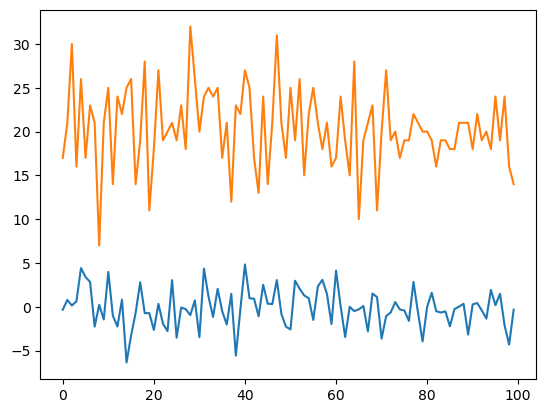

In [124]:
plt.plot(b);plt.plot(Nt)

In [127]:
sum(np.random.normal(0,1, 100))

-11.364770803365014

In [135]:
np.mean(a), np.mean(b)

(-8.380218888736627e-05, -7.681444388232509e-05)

In [136]:
np.std(a), np.std(b)

(0.44634080428601014, 0.4473211842331598)

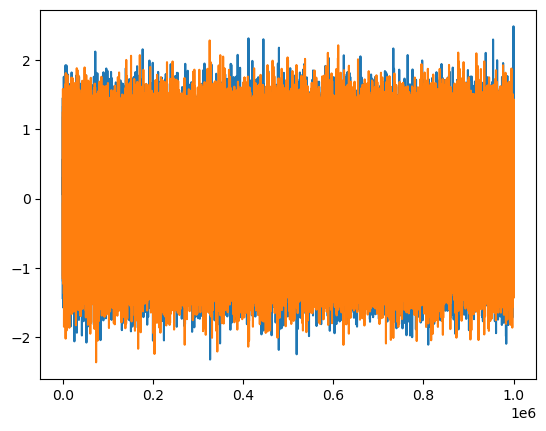

In [134]:
plt.plot(a); plt.plot(b)

In [96]:
confint[1]-confint[0]

0.06758207237471936

In [168]:
start = time.time()
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2 - rate*(np.exp(delta+eta**2/2)-1)
M = 500000000
confint = np.zeros(2)
vCall = 0
S = np.zeros(M)
Nt = np.random.poisson(lam = rate*T, size = M)
W = np.random.normal(0, np.sqrt(T), size = M)
S = S0*np.exp(mu*T+sig*W+np.random.normal(Nt*delta, np.sqrt(Nt)*eta))
Payoff = np.exp(-r*T)*np.maximum(S - K,0)
aMcall=np.mean(Payoff);
bMcall=np.std(Payoff);
confint = [aMcall-1.96*bMcall/np.sqrt(M),aMcall+1.96*bMcall/np.sqrt(M)]
vCall = aMcall
price = 0
for n in range(100):
    price = price + (T*rate)**n/math.factorial(n)*BScall(S0*np.exp(n*delta+n*eta**2/2 - rate*(np.exp(delta+eta**2/2)-1)*T), K, r, np.sqrt(sig**2 + n*eta**2/T), T)
BSprice = np.exp(-rate*T)*price
confint, BSprice
end = time.time()
print(end-start)
confint

MemoryError: Unable to allocate 3.73 GiB for an array with shape (500000000,) and data type float64

In [233]:
# Monte Carlo for European delta

# import numpy as num

# import math

# Step 1. Define parameters

#S = 50.;           # Current asset value
h = 0.1;          # Size of perturbation of current asset value 
#E = 52.;           # Strike price
#T = 1.;            # Expiration time
#r = 0.06;         # Risk free rate
#sigma = 0.1;      # Volatility

M=1000;            # Number of samples

# Step 2. Create a vector holding put values for each random sample

Vcall = np.zeros((M,1));
Vput = np.zeros((M,1));
Vhput = np.zeros((M,1))

#for i in range(0,M):
#    Sfinal = S*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*num.random.normal(0,1,1));
#    Shfinal = (S+h)*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*num.random.normal(0,1,1));
#    Vput[i]=num.exp(-r*T)*num.maximum(E-Sfinal,0); # Discounted payoff for a European put
#    Vhput[i]=num.exp(-r*T)*num.maximum(E-Shfinal,0); # Discounted payoff for perturbed European put

Sfinal = np.zeros(M)
Shfinal = np.zeros(M)
Nt = np.random.poisson(lam = rate*T, size = M)
W = np.random.normal(0, np.sqrt(T), size = M)
a = np.random.normal(Nt*delta, np.sqrt(Nt)*eta)
Sfinal = S0*np.exp(mu*T+sig*W+a)
Shfinal = (S0+h)*np.exp(mu*T+sig*W+a)
Vput = np.maximum(K-Sfinal, 0)
Vhput = np.maximum(K-Shfinal, 0)


# rand = num.random.normal(0, 1, M)
# for i in range(0, M):
#     Sfinal = S*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*rand[i])
#     Shfinal = (S+h)*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*rand[i]);
#     Vput[i]=num.maximum(E-Sfinal,0); # Discounted payoff for a European put
#     Vhput[i]=num.maximum(E-Shfinal,0); # Discounted payoff for perturbed European put
    
# Step 3. Compute delta

#aMput=num.mean(Vput);
#aMhput=num.mean(Vhput);

#bMput = num.std(Vput);
#bMhput = num.std(Vhput);

#delta = (aMhput-aMput)/h;

#conf = [delta-1.96*(bMput+bMhput)/(h*math.sqrt(M)),delta+1.96*(bMput+bMhput)/(h*math.sqrt(M))];

deltatemp = np.zeros((M-1))
deltatemp = np.exp(-r*T)*(Vhput - Vput)/h
delta = np.exp(-r*T)*np.mean(Vhput - Vput)/h
bm = np.var(deltatemp - delta, ddof = 1)
conf = [delta - 1.96*bm/math.sqrt(M), delta + 1.96*bm/math.sqrt(M)]

# Step 4. Direct calculation 

d1 = (math.log(S0/E)+(r+0.5*sig**2)*T)/(sig*math.sqrt(T));
N1=0.5*(1+math.erf(d1/math.sqrt(2)));


# Step 5. Output Monte Carlo estimate of delta and true value confidence intervals and Black-Scholes values

print(delta);
print(conf);
print(N1-1)

-0.00612289736068842
[-0.006129222795393083, -0.006116571925983756]
0.0


In [240]:
np.max(deltatemp)

-1.3599152822225147e-05

In [205]:
Sfinal

array([4.32416679e-38, 3.69701216e-40, 9.83489711e-33, ...,
       3.75476393e-38, 6.64837318e-33, 1.44317506e-42])

In [178]:
bm

15614.784417538056

In [176]:
E

10

In [143]:
BSprice

38.896633145089716

In [144]:
start = time.time()
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2 - rate*(np.exp(delta+eta**2/2)-1)
M = 110000000
confint = np.zeros(2)
vCall = 0
S = np.zeros(M)
# Nt = np.random.poisson(lam = rate*T, size = M)
W = np.random.normal(0, np.sqrt(T), size = M)
# for j in range(M):
#     S[j] = S0*np.exp(mu*T+sig*W[j]+sum(np.random.normal(delta, eta, Nt[j])))
S = S0*np.exp(mu*T+sig*W)
Payoff = np.exp(-r*T)*np.maximum(S - K,0)
aMcall=np.mean(Payoff);
bMcall=np.std(Payoff);
confint = [aMcall-1.96*bMcall/np.sqrt(M),aMcall+1.96*bMcall/np.sqrt(M)]
vCall = aMcall
price = 0
for n in range(100):
    price = price + (T*rate)**n/math.factorial(n)*BScall(S0*np.exp(n*delta+n*eta**2/2 - rate*(np.exp(delta+eta**2/2)-1)*T), K, r, np.sqrt(sig**2 + n*eta**2/T), T)
BSprice = np.exp(-rate*T)*price
confint, BSprice
end = time.time()
print(end-start)

10.307332038879395


In [145]:
confint[1]-confint[0]

0.009986323424271859

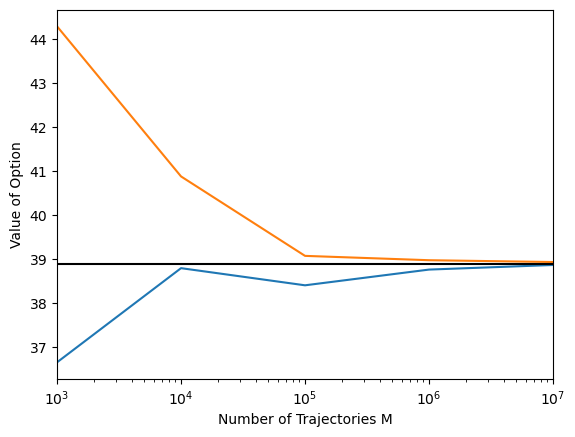

In [255]:
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2 - rate*(np.exp(delta+eta**2/2)-1)
M = [1000, 10000, 100000, 1000000, 10000000]
confint = np.zeros((len(M),2))
vCall = np.zeros(len(M))
for i in range(len(M)):
    S = np.zeros(M[i])
    Nt = np.random.poisson(lam = rate*T, size = M[i])
    W = np.random.normal(0, np.sqrt(T), size = M[i])
    S = S0*np.exp(mu*T+sig*W+np.random.normal(Nt*delta, np.sqrt(Nt)*eta))
    Payoff = np.exp(-r*T)*np.maximum(S - K,0)
    aMcall=np.mean(Payoff);
    bMcall=np.std(Payoff);
    confint[i,:] = [aMcall-1.96*bMcall/np.sqrt(M[i]),aMcall+1.96*bMcall/np.sqrt(M[i])]
    vCall[i] = aMcall
price = 0
for n in range(100):
    price = price + (T*rate)**n/math.factorial(n)*BScall(S0*np.exp(n*delta+n*eta**2/2 - rate*(np.exp(delta+eta**2/2)-1)*T), K, r, np.sqrt(sig**2 + n*eta**2/T), T)
BSprice = np.exp(-rate*T)*price
plt.plot(M, confint)
plt.xscale("log")
plt.xlabel("Number of Trajectories M")
plt.ylabel("Value of Option")
plt.axhline(y = BSprice, color = "black")
plt.xlim(M[0], M[len(M)-1])
plt.savefig("Convergence")

In [251]:
confint

array([[35.41892458, 41.8394578 ],
       [38.37948285, 40.51057581],
       [38.65680786, 39.32971642],
       [38.65375263, 38.86596063]])

In [154]:
def BScall(S, E, r, sigma, T):
    d1 = (math.log(S/E)+(r+0.5*sigma**2)*T)/(sigma*math.sqrt(T));
    d2=d1-sigma*math.sqrt(T);
    N1=0.5*(1+math.erf(d1/math.sqrt(2)));
    N2=0.5*(1+math.erf(d2/math.sqrt(2)));
    bsCall=S*N1-E*math.exp(-r*T)*N2
    return bsCall

In [71]:
#Could do my own

In [162]:
from scipy.stats import norm

In [157]:
def euroCallBenchmark(E,S0,r,sigma,T): 
    enDee1=norm.cdf(d1(E,S0,r,sigma,T)) 
    enDee2=norm.cdf(d2(E,S0,r,sigma,T)) 
    return(S0*enDee1-E*dFac(r,T)*enDee2)

In [165]:
def d1(E,S0,r,sig,T): 
    logSE=np.log(S0/E) 
    return((logSE+(r+0.5*sig**2)*T)/(sig*np.sqrt(T))) 
def d2(E,S0,r,sig,T):
    return(d1(E,S0,r,sig,T)-sig*np.sqrt(T))

In [158]:
def deltaCall(E,S0,r,sig,T): 
    return(norm.cdf(d1(E,S0,r,sig,T)))

In [155]:
def bsEnsemble(S0, mu, sig, T, M, N, rng):
    dt=T/N 
    increments=rng.normal(0,np.sqrt(dt),size=(M,N))
    t=np.linspace(dt,1,N)
    W=np.cumsum(increments,axis=1)
    t=np.insert(t,0,0) 
    W=np.c_[np.zeros(M),W]
    S=S0*np.exp((mu-0.5*sig**2)*t+sig*W)
    return S

In [146]:
def dFac(r,dt): 
    return(np.exp(-r*dt))

In [166]:
#Option parameters 
S0=10; E=10; r=0.01; mu=0.03; sig=0.5; T=1
#Simulation parameters and instantiate local RNG 
M=1; N=2**8 
dt=T/N; t=np.linspace(0,1,N+1) 
rng=np.random.default_rng()
# Generate real-world form of asset price trajectory 
ens=bsEnsemble(S0,mu,sig,T,M,N,rng); ens=ens[0,:]

# Cash acquired from sale of call option 
C0=euroCallBenchmark(E,S0,r,sig,T) 
# Initial value of delta and hedging portfolio 
delta0=deltaCall(E,S0,r,sig,T) 
pnl0=C0-delta0*S0 
# Instantiate array to hold portfolio values over time 
pnl=pnl0*np.ones(len(t))

for i in range(0,len(t)-2): 
# Update current and previous times-to-expiry 
    nwTExp=T-t[i+1]; odTExp=T-t[i] 
    # Compute Delta at current and previous times 
    nwAsset=ens[i+1]; odAsset=ens[i] 
    nwDel=deltaCall(E,nwAsset,r,sig,nwTExp) 
    odDel=deltaCall(E,odAsset,r,sig,odTExp) 
    # Update hedging portfolio 
    pnl[i+1]=pnl[i]*dFac(-r,dt)-(nwDel-odDel)*nwAsset
    
finalHedge=pnl[N-1]*dFac(-r,dt)+nwDel*ens[N] 
pnl[N]=finalHedge-np.maximum(ens[-1]-E,0)